## BAB 1. Pengenalan Matplotlib dan Persiapan Dataset

### 1.1  Apa dan Kenapa Matplotlib

Dalam menganalisa data, sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki. 

Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.

 

Dalam modul ini, akan dijelaskan beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:

    1. Pengolahan dataset (menggunakan library NumPy & Pandas).
    2. Membuat grafik dasar menggunakan matplotlib.
    3. Melakukan modifikasi komponen visualisasi, seperti axis, labels, 
       title, dan legend.
    4. Menyimpan plot visualisasi yang sudah dibuat


### 1.2 Pengenalan Dataset 

In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


### 1.3 Penjelasan Dataset 

    1. order_id : ID dari order/transaksi, 1 transaksi bisa terdiri
       dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
    2. order_date : tanggal terjadinya transaksi
    3. customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 
       customer melakukan transaksi beberapa kali
    4. city : kota tempat toko terjadinya transaksi
    5. province : provinsi (berdasarkan city)
    6. product_id : ID dari suatu product yang dibeli
    7. brand : brand/merk dari product. Suatu product yang sama pasti 
       memiliki brand yang sama
    8. quantity : Kuantitas/banyaknya product yang dibeli
    9. item_price : Harga dari 1 product (dalam Rupiah). Suatu product 
       yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

### 1.4 Penambahan Kolom Order Month pada Dataset

In [2]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


Ada beberapa function yang berperan di sini:

    1. apply & lambda biasa digunakan untuk membuat kolom baru, 
       berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda 
       x: x*2) berarti setiap input x di dalam kolom, akan diubah 
       menjadi x*2). Dalam hal ini kolom yang sudah ada adalah 
       dataset['order_date'], lalu tiap nilai di dalamnya kita proses 
       agar menjadi month-nya saja
    2. Function datetime.datetime.strptime digunakan untuk mengubah 
       date/time dalam bentuk string menjadi tipe data datetime.
    3. Function strftime digunakan untuk mengubah format suatu data 
       bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang 
       berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun 
       dan bulan saja, tanggalnya sudah tidak ada. 


### 1.5 Penambahan Kolom GMV pada Dataset

In [3]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))

dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' %dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


## BAB 2. Plot Pertama dengan Matplotlib 

### 2.1 Membuat Data Agregat 

In [4]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


### 2.2 Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV 

Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function plt.plot lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom order_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show() untuk menampilkan grafiknya.

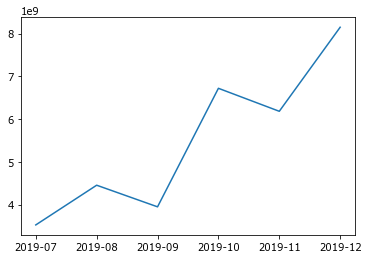

In [5]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

### 2.3 Cara Alternatif: Fungsi .plot() pada pandas Dataframe 

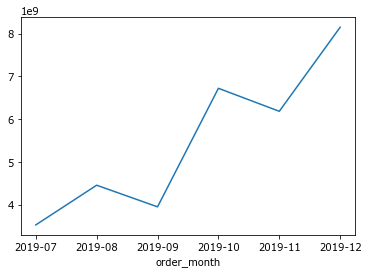

In [6]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

### 2.4 Kesimpulan 

    1. Kita dapat menggunakan fungsi plt.plot() dari library 
       matplotlib.pyplot as plt
    2. atau dengan menggunakan fungsi .plot() langsung dari variabel 
       dataframe, yaitu dataset pada kasus kita sebelumnya. 

Dengan grafik yang sudah aku buat ini saja, sudah bisa melihat trend dan insight-nya. Untuk analisis cepat, grafik seperti ini terkadang sudah cukup.

Tapi untuk presentasi ke atasan, tentu kita harus membuat grafik yang lebih ‘cantik’.

## BAB 3. Kustomisasi Grafik - Part 1 

### 3.1 Anatomi dari Figure 

Sebelum mulai kustomisasi, ada baiknya kita pahami dulu anatomi dari sebuah Figure di maplotlib. Bisa dilihat sesuai di gambar berikut,” jelas Senja sambil menampilkan layar berisi contoh gambar:
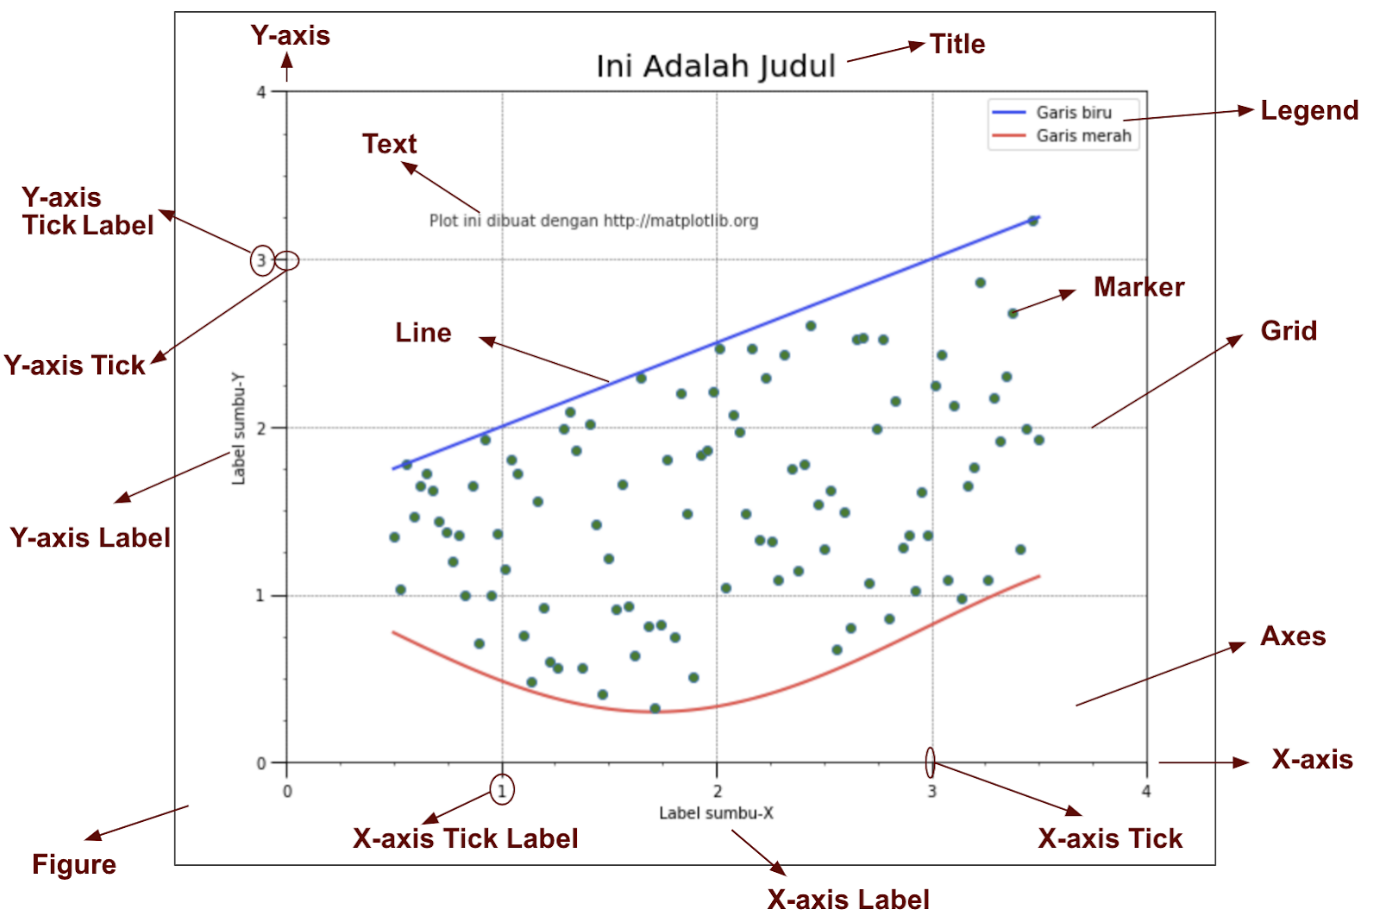

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

    1. Figure adalah keseluruhan visualisasi yang kita plot dalam 1 
       kali menjalankan code.
    2. Sedangkan satu plot (yang dibuat saat memanggil .plot() atau 
       .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari 
       beberapa Axes. 
    3. Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-
       axis). Masing-masing sumbu memiliki komponen sebagai berikut:
            a. Axis Label: Nama dari sumbu yang ditampilkan.
            b. Tick: Penanda berupa titik/garis kecil yang berjajar di 
               sumbu, sebagai referensi skala nilai.
            c. Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
    4. Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), 
       atau marker (untuk scatter plot), bisa juga bentuk lain seperti 
       bar (untuk bar plot/histogram).
    5. Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk 
       mempermudah melihat tick yang sejajar, dan Text untuk memberikan 
       informasi tambahan berbentuk teks di grafik.

Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html

### 3.2 Mengubah Figure Size

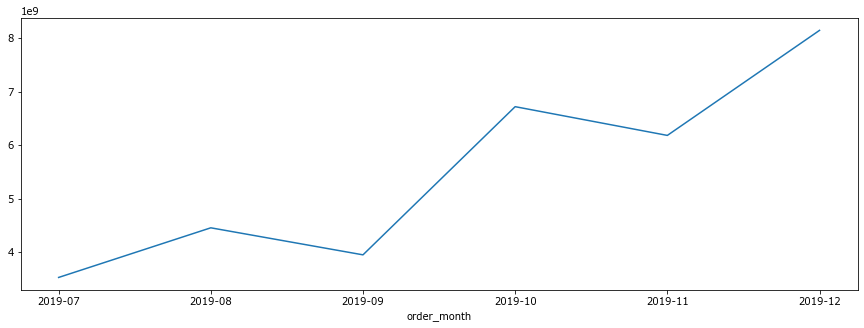

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

###  3.3 Menambahkan Title dan Axis Labels

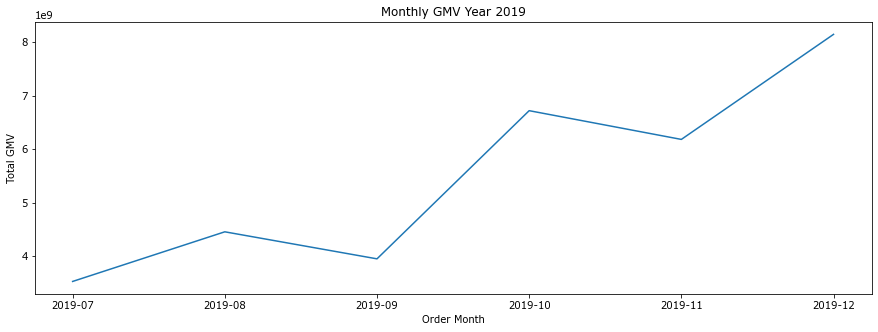

In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

### 3.4 Kustomisasi Title and Axis Labels 

untuk judul/title, parameter yang bisa ditambahkan:

    1. loc: digunakan untuk menentukan posisi title, misalnya ‘left’ 
       untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ 
       untuk meletakkannya di tengah. Jika tidak didefinisikan, maka 
       default-nya title ada di tengah.
    2. pad: digunakan untuk menambahkan jarak antara judul ke grafik 
       (dalam satuan px), misalnya kita tidak ingin judulnya terlalu 
       menempel dengan grafiknya, jadi kita beri jarak.
    3. fontsize: digunakan untuk mengganti ukuran font/huruf (dalam 
       satuan px).
    4. color: digunakan untuk mengganti warna huruf judul. Kita bisa 
       menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, 
       ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' 
       untuk warna biru muda

Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc. 

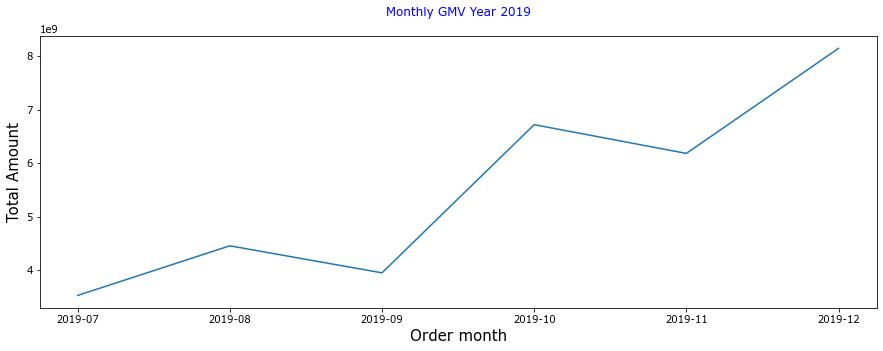

In [9]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, color='blue')
plt.xlabel('Order month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

### 3.5 Kustomisasi Line dan Point 

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

    1. color: mengubah warnanya (sama seperti di title)
    2. linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
    3. linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' 
       untuk garis tak terputus (seperti pada default), '--' atau 
       'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis 
       berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis 
       dan titik bergantian.
    4. marker: mengubah tipe points/titik data di chart. Ada banyak 
       sekali kemungkinan nilai untuk marker ini, yang biasanya 
       digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan 
       agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan 
       bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

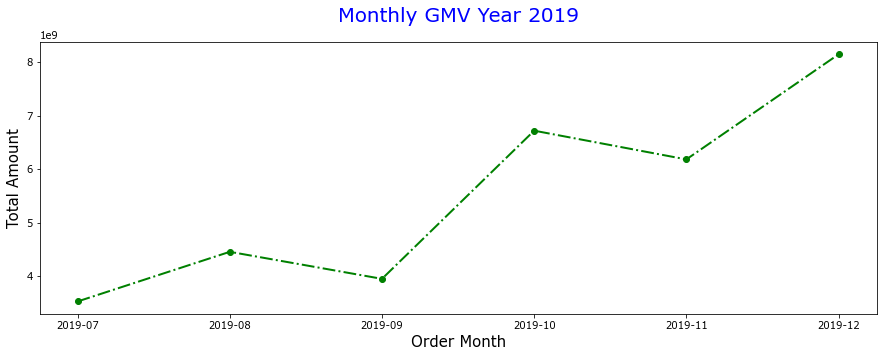

In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m"))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

### 3.6 Kustomisasi Grid 

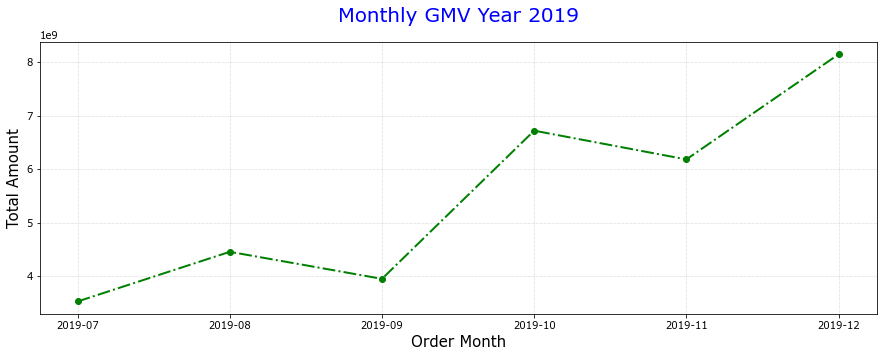

In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

## BAB 4. Kustomisasi Grafik - Part 2 

### 4.1 Kustomisasi Axis Ticks 

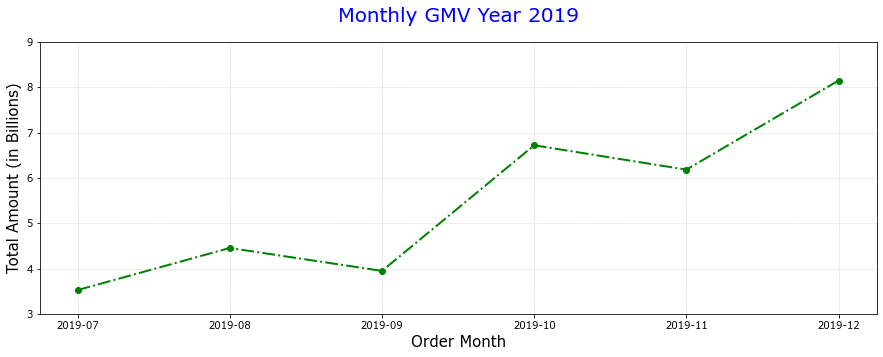

In [12]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

### 4.2 Menentukan Batas Minimum dan Maksimum Axis Ticks 

Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0)

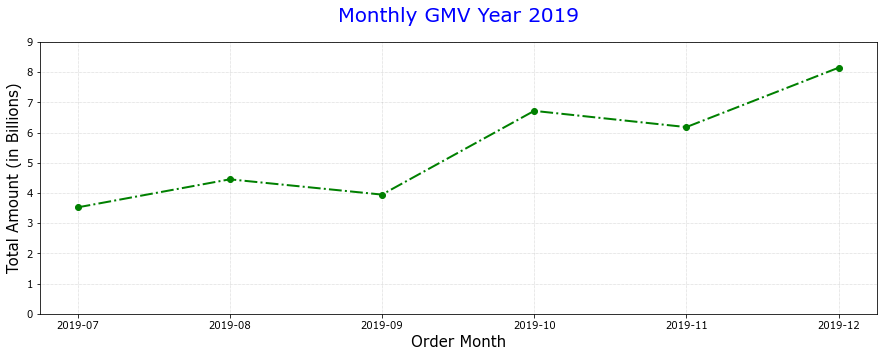

In [13]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

### 4.3 Menambahkan Informasi Pada Plot 

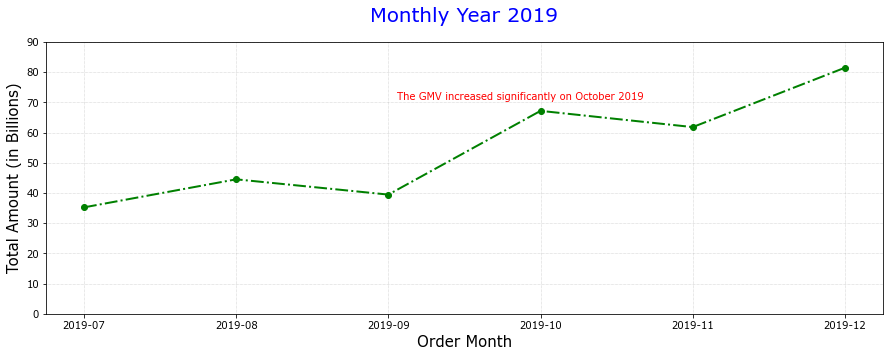

In [14]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

### 4.4 Menyimpan Hasil Plot Menjadi File Image 

Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

In [15]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

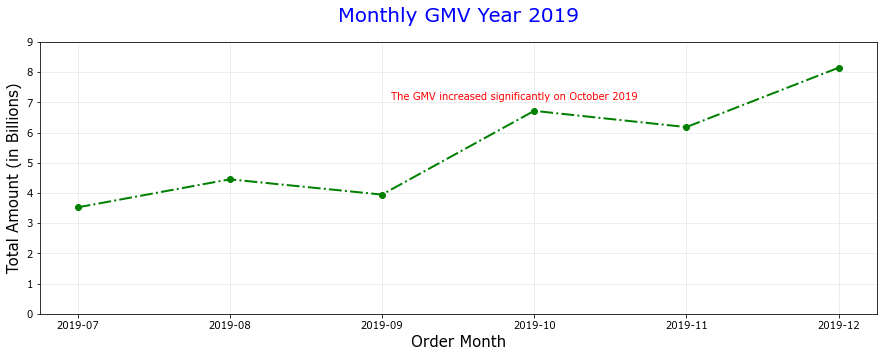

In [16]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

### 4.5 Pengaturan Parameter untuk Menyimpan Gambar 

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

    1. dpi: Resolusi gambar (dots per inch). 
    2. quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau 
       jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling 
       bagus).
    3. facecolor: Memberikan warna bagian depan figure, di luar area 
       plot 
    4. edgecolor: Memberikan warna pinggiran gambar
    5. transparent: Jika nilainya True, maka gambarnya jadi transparan 
       (jika file-nya png)

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

<ipython-input-17-4409306583cb>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('monthly_gmv.png', quality=95)


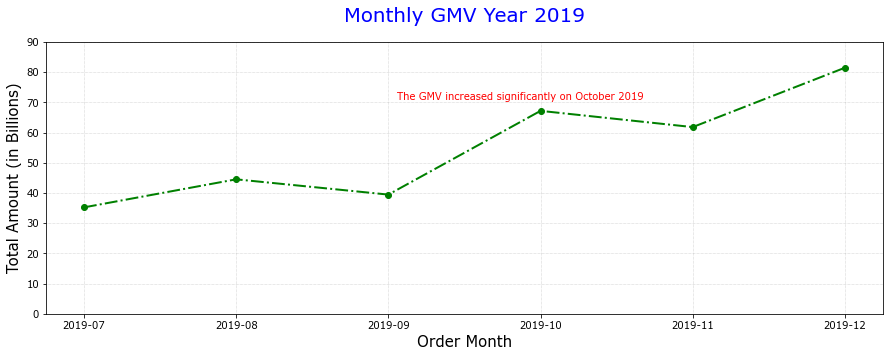

In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

## BAB 5. Mini Project

### Studi Kasus dari Senja: Daily number of customers on Desember

Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

    1. Ukuran figure adalah 10x5
    2. Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 
       2019
    3. Sumbu-y adalah jumlah unique customers di tiap tanggal
    4. Title dan axis label harus ada, tulisan dan style-nya silakan 
       disesuaikan sendiri


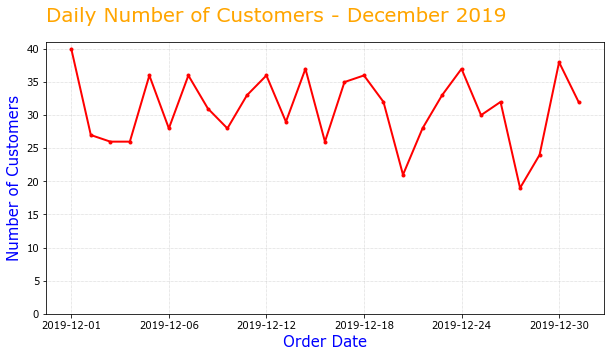

In [18]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

Berdasarkan materi-materi yang telah aku pelajari dan praktikkan dalam modul ini, aku sudah mendapatkan pengetahuan (knowledge) dan praktik (skill) yang diantaranya:

    1. mempersiapkan dulu data yang dibutuhkan,
    2. membuat plot dari data yang telah dipersiapkan,
    3. mengkustomisasi berbagai komponen di chart yang telah dibuat, 
       seperti figure size, title/judul, axis labels, axis ticks, style 
       dari line/points di chart, grid, teks, dan lain sebagainya,
    4. menyimpan gambar yang telah dibuat.
